In [1]:
import juno
import numpy as np
from LightPipes import *
from matplotlib import pyplot as plt
from juno.structures import SimulationStage
from juno.Lens import Lens
from juno.Simulation import generate_sq_freq_arr, propagate_over_distance
from scipy import fftpack

In [2]:
array = np.load(r"C:\Users\User\Github\juno_custom\juno_custom\saved_arrays\longer_field.npy")
# pad array on all 4 sides by 200 pixels
array = np.pad(array, 100, mode="constant", constant_values=0)
wavelength = 488e-9
wavenumber = 2 * np.pi / wavelength
pixel_size = 0.1*1e-6
freq_arr = generate_sq_freq_arr(array, pixel_size)
distance = 6.e-6
fft_wavefront = fftpack.fft2(array)
rounded_output, propagation = propagate_over_distance(
    fft_wavefront, distance, freq_arr, wavenumber
)



FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User\\Github\\juno_custom\\juno_custom\\saved_arrays\\longer_field.npy'

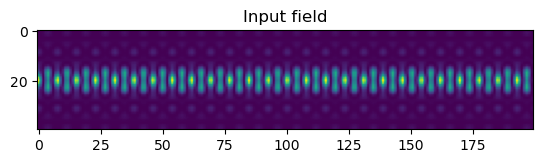

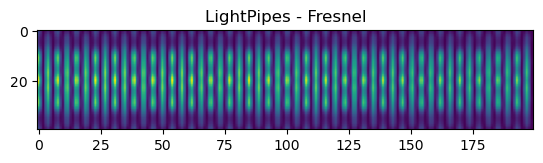

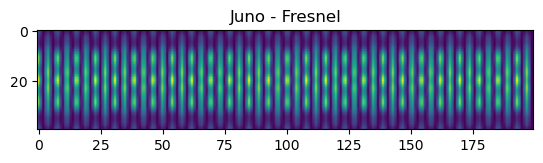

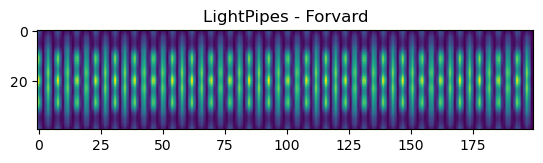

In [ ]:
grid_dimension = array.shape[0]
grid_size = grid_dimension * pixel_size
Field = Begin(grid_size, wavelength, grid_dimension)
Field.field = array
I_Field = Intensity(0, Field)
center_y = Field.field.shape[0]// 2
center_x = Field.field.shape[1]// 2
plt.imshow(I_Field[center_y-20:center_y+20, 600:800])
plt.title("Input field")
plt.show()

Field_fresnel = Fresnel(distance * m, Field)
I_Fresnel = Intensity(0, Field_fresnel)
plt.imshow(I_Fresnel[center_y-20:center_y+20, 600:800])
plt.title("LightPipes - Fresnel")
plt.show()

plt.imshow(rounded_output[center_y-20:center_y+20, 600:800])
plt.title("Juno - Fresnel")
plt.show()

Field_forvard = Forvard(Field, distance * m)
I_Forvard = Intensity(0, Field_forvard)
plt.title("LightPipes - Forvard")
plt.imshow(I_Forvard[center_y-20:center_y+20, 600:800])
plt.show()


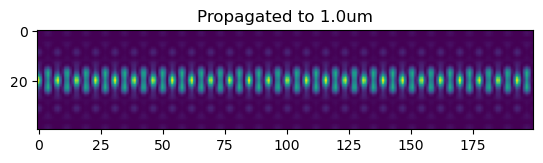

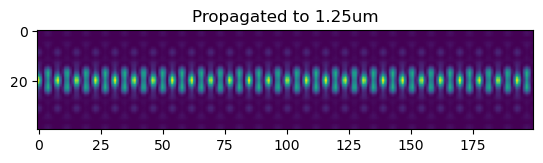

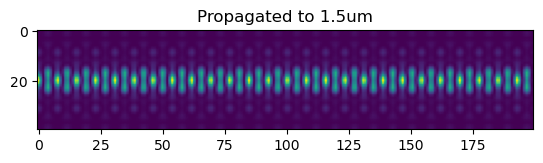

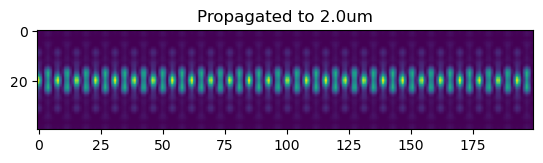

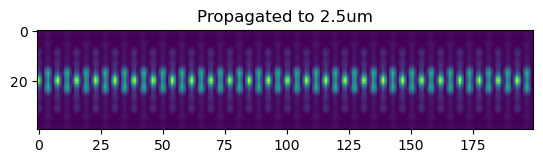

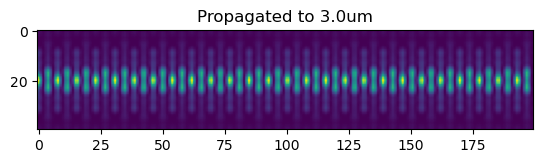

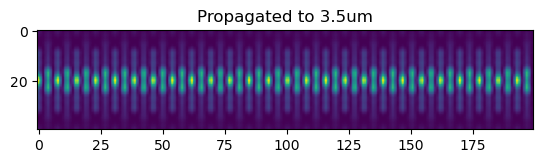

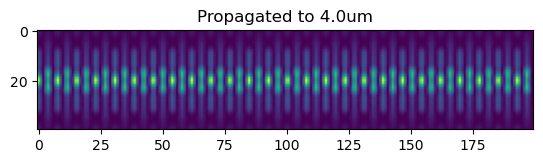

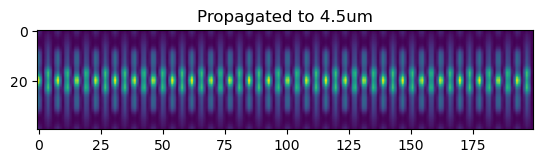

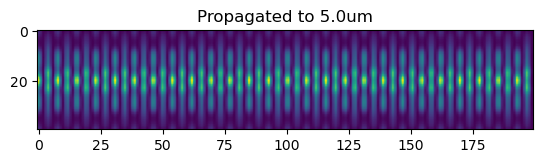

In [ ]:
distances = [1.e-6, 1.25e-6, 1.5e-6, 2e-6, 2.5e-6, 3.e-6, 3.5e-6, 4e-6, 4.5e-6, 5.e-6]

for distance in distances: 
        
    grid_dimension = array.shape[0]
    grid_size = grid_dimension * pixel_size
    Field = Begin(grid_size, wavelength, grid_dimension)
    Field.field = array
    I_Field = Intensity(0, Field)
    center_y = Field.field.shape[0]// 2
    center_x = Field.field.shape[1]// 2
    # plt.imshow(I_Field[center_y-20:center_y+20, 600:800])
    # plt.show()

    # Field_fresnel = Fresnel(distance * m, Field)
    # I_Fresnel = Intensity(0, Field_fresnel)
    # plt.imshow(I_Fresnel[center_y-20:center_y+20, 600:800])
    # plt.show()

    # plt.imshow(rounded_output[center_y-20:center_y+20, 600:800])
    # plt.show()

    Field_forvard = Forvard(Field, distance * m)
    I_Forvard = Intensity(0, Field_forvard)
    plt.title(f"Propagated to {str(distance*1e6)}um")
    plt.imshow(I_Forvard[center_y-20:center_y+20, 600:800])
    plt.show()


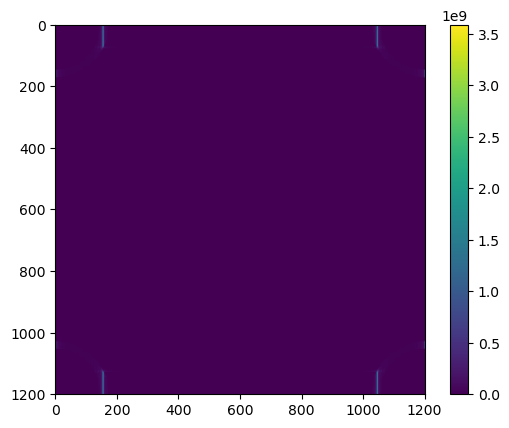

In [ ]:
# take the fft of the field 
fft_wavefront = fftpack.fft2(Field.field)
# plot
plt.imshow(np.abs(fft_wavefront))
plt.colorbar()
plt.show()

